**Data Info**

The dataset used is taken from the Stackoverflow survey response data which records the details, and preferences of 
thousands of users of the StackOverflow website.

Importing and reading data taken from the url from datacamp

In [1]:
import pandas as pd
import requests
url="https://assets.datacamp.com/production/repositories/3752/datasets/19699a2441073ad6459bf5e3e17690e2cae86cf1/Combined_DS_v10.csv"
data=pd.read_csv(url)

In [2]:
print(data)


         SurveyDate                                    FormalEducation  \
0     2/28/18 20:20           Bachelor's degree (BA. BS. B.Eng.. etc.)   
1     6/28/18 13:26           Bachelor's degree (BA. BS. B.Eng.. etc.)   
2       6/6/18 3:37           Bachelor's degree (BA. BS. B.Eng.. etc.)   
3       5/9/18 1:06  Some college/university study without earning ...   
4     4/12/18 22:41           Bachelor's degree (BA. BS. B.Eng.. etc.)   
..              ...                                                ...   
994  10/19/18 13:50  Some college/university study without earning ...   
995   4/14/18 15:31           Bachelor's degree (BA. BS. B.Eng.. etc.)   
996    3/21/18 6:34           Bachelor's degree (BA. BS. B.Eng.. etc.)   
997    2/5/18 20:01           Bachelor's degree (BA. BS. B.Eng.. etc.)   
998   2/11/18 21:23           Bachelor's degree (BA. BS. B.Eng.. etc.)   

     ConvertedSalary Hobby       Country  StackOverflowJobsRecommend  \
0                NaN   Yes  South Afric

In [3]:
data.head()

,SurveyDate,FormalEducation,ConvertedSalary,Hobby,Country,StackOverflowJobsRecommend,VersionControl,Age,Years Experience,Gender,RawSalary
0,2/28/18 20:20,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,Yes,South Africa,NaN,Git,21,13,Male,NaN
1,6/28/18 13:26,Bachelor's degree (BA. BS. B.Eng.. etc.),70841.0,Yes,Sweeden,7.0,Git;Subversion,38,9,Male,"70,841.00"
2,6/6/18 3:37,Bachelor's degree (BA. BS. B.Eng.. etc.),NaN,No,Sweeden,8.0,Git,45,11,NaN,NaN
3,5/9/18 1:06,Some college/university study without earning ...,21426.0,Yes,Sweeden,NaN,Zip file back-ups,46,12,Male,"21,426.00"
4,4/12/18 22:41,Bachelor's degree (BA. BS. B.Eng.. etc.),41671.0,Yes,UK,8.0,Git,39,7,Male,"£41,671.00"


Create subset of only the numeric columns

In [4]:
numeric_data=data.select_dtypes(include=['int','float'])
print(numeric_data.columns)

Index(['ConvertedSalary', 'StackOverflowJobsRecommend', 'Age',
       'Years Experience'],
      dtype='object')


In [5]:
print(data.columns)

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby', 'Country',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary'],
      dtype='object')


Convert the 'Country' column to a one hot encoded data frame

In [6]:
one_hot_encoded=pd.get_dummies(data,columns=['Country'],prefix='OH')
print(one_hot_encoded.columns)

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'OH_France', 'OH_India',
       'OH_Ireland', 'OH_Russia', 'OH_South Africa', 'OH_Spain', 'OH_Sweeden',
       'OH_UK', 'OH_USA', 'OH_Ukraine'],
      dtype='object')


Create dummy variables for the Country column

In [7]:
dummy=pd.get_dummies(data,columns=['Country'],drop_first=True,prefix='DM')
print(dummy.columns)

Index(['SurveyDate', 'FormalEducation', 'ConvertedSalary', 'Hobby',
       'StackOverflowJobsRecommend', 'VersionControl', 'Age',
       'Years Experience', 'Gender', 'RawSalary', 'DM_India', 'DM_Ireland',
       'DM_Russia', 'DM_South Africa', 'DM_Spain', 'DM_Sweeden', 'DM_UK',
       'DM_USA', 'DM_Ukraine'],
      dtype='object')


Counting the values based on country

In [8]:
countries=data.Country
country_counts=countries.value_counts()
print(country_counts)

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
UK               95
India            95
Ukraine           9
Ireland           5
Name: Country, dtype: int64


Create a mask for values occurring less than 10 times in count of countries

In [9]:
countries=data["Country"]
country_counts=countries.value_counts()
mask=countries.isin(country_counts[country_counts<10].index)
print(mask.head())

0    False
1    False
2    False
3    False
4    False
Name: Country, dtype: bool


Label values occurring less than the mask cutoff as 'Other'

In [10]:
countries[mask]='Other'
print(countries.value_counts())

South Africa    166
USA             164
Spain           134
Sweeden         119
France          115
Russia           97
UK               95
India            95
Other            14
Name: Country, dtype: int64


/var/folders/s8/w_txbs_n3nd84l3rd0mc41br0000gn/T/ipykernel_5850/114112412.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  countries[mask]='Other'


Create a new column called Paid_Job filled with zeros and replace all the Paid_Job values 
with a 1 where the corresponding ConvertedSalary is greater than 0.

In [11]:
data['Paid_Job']=0
data['ConvertedSalary']=data['ConvertedSalary'].fillna(0)
data.loc[data['ConvertedSalary']>0,'Paid_Job']=1
print(data[['Paid_Job','ConvertedSalary']].head())

   Paid_Job  ConvertedSalary
0         0              0.0
1         1          70841.0
2         0              0.0
3         1          21426.0
4         1          41671.0


Bin the value of the ConvertedSalary column into 5 equal bins

In [12]:
data['equal_binned']=pd.cut(data['ConvertedSalary'],bins=5)
print(data[['equal_binned','ConvertedSalary']].head())

          equal_binned  ConvertedSalary
0  (-2000.0, 400000.0]              0.0
1  (-2000.0, 400000.0]          70841.0
2  (-2000.0, 400000.0]              0.0
3  (-2000.0, 400000.0]          21426.0
4  (-2000.0, 400000.0]          41671.0


Bin the ConvertedSalary column using the boundaries in the list bins and label the bins using labels

In [13]:
import numpy as np
bins=[-np.inf,10000,50000,100000,150000,np.inf]
labels=['Very low','Low','Medium','High','Very High']
data['boundary_binned']=pd.cut(data['ConvertedSalary'],bins=bins,labels=labels)
print(data[['boundary_binned','ConvertedSalary']].head())

  boundary_binned  ConvertedSalary
0        Very low              0.0
1          Medium          70841.0
2        Very low              0.0
3             Low          21426.0
4             Low          41671.0


In [14]:
sub_df=data[['Age','Gender']]
print(sub_df.notnull().sum())

Age       999
Gender    693
dtype: int64


In [15]:
print(sub_df.head(10))

   Age  Gender
0   21    Male
1   38    Male
2   45     NaN
3   46    Male
4   39    Male
5   39    Male
6   34    Male
7   24  Female
8   23    Male
9   36     NaN


In [16]:
print(sub_df.head(10).isna())

     Age  Gender
0  False   False
1  False   False
2  False    True
3  False   False
4  False   False
5  False   False
6  False   False
7  False   False
8  False   False
9  False    True


In [17]:
print(sub_df.head(10).notnull())

    Age  Gender
0  True    True
1  True    True
2  True   False
3  True    True
4  True    True
5  True    True
6  True    True
7  True    True
8  True    True
9  True   False


In [18]:
print(data.shape)

(999, 14)


In [19]:
no_missing_rows=data.dropna(how='any')

In [20]:
print(no_missing_rows.shape)

(264, 14)


In [21]:
no_missing_columns=data.dropna(how='any',axis=1)
print(no_missing_columns.shape)

(999, 11)


In [22]:
no_gender=data.dropna(subset=['Gender'])
print(no_gender.shape)

(693, 14)


In [23]:
print(data['Gender'].value_counts())

Male                                                                         632
Female                                                                        53
Female;Male                                                                    2
Transgender                                                                    2
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Male;Non-binary. genderqueer. or gender non-conforming                         1
Non-binary. genderqueer. or gender non-conforming                              1
Female;Transgender                                                             1
Name: Gender, dtype: int64


In [24]:
data['Gender'].fillna(value='Not Given',inplace=True)
print(data['Gender'].value_counts())

Male                                                                         632
Not Given                                                                    306
Female                                                                        53
Female;Male                                                                    2
Transgender                                                                    2
Female;Male;Transgender;Non-binary. genderqueer. or gender non-conforming      1
Male;Non-binary. genderqueer. or gender non-conforming                         1
Non-binary. genderqueer. or gender non-conforming                              1
Female;Transgender                                                             1
Name: Gender, dtype: int64


In [25]:
print(data['StackOverflowJobsRecommend'].head())

0    NaN
1    7.0
2    8.0
3    NaN
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64


In [26]:
data['StackOverflowJobsRecommend'].fillna(data['StackOverflowJobsRecommend'].mean(),inplace=True)
print(data['StackOverflowJobsRecommend'].head())

0    7.061602
1    7.000000
2    8.000000
3    7.061602
4    8.000000
Name: StackOverflowJobsRecommend, dtype: float64


In [27]:
data['StackOverflowJobsRecommend']=round(data['StackOverflowJobsRecommend'])
print(data['StackOverflowJobsRecommend'].head())

0    7.0
1    7.0
2    8.0
3    7.0
4    8.0
Name: StackOverflowJobsRecommend, dtype: float64


In [28]:
numeric_vals=pd.to_numeric(data['RawSalary'],errors='coerce')
index=numeric_vals.isna()
print(data['RawSalary'][index])

0               NaN
1         70,841.00
2               NaN
3         21,426.00
4        £41,671.00
           ...     
994             NaN
995       58,746.00
996      $55,000.00
997             NaN
998    1,000,000.00
Name: RawSalary, Length: 995, dtype: object


In [29]:
data['RawSalary']=data['RawSalary']\
.str.replace(',','')\
.str.replace('$','')\
.str.replace('£','')\
.astype('float')
print(data['RawSalary'])

0            NaN
1        70841.0
2            NaN
3        21426.0
4        41671.0
         ...    
994          NaN
995      58746.0
996      55000.0
997          NaN
998    1000000.0
Name: RawSalary, Length: 999, dtype: float64


/var/folders/s8/w_txbs_n3nd84l3rd0mc41br0000gn/T/ipykernel_5850/1043678527.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['RawSalary']=data['RawSalary']\


array([[<AxesSubplot:title={'center':'ConvertedSalary'}>,
        <AxesSubplot:title={'center':'StackOverflowJobsRecommend'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Years Experience'}>]], dtype=object)

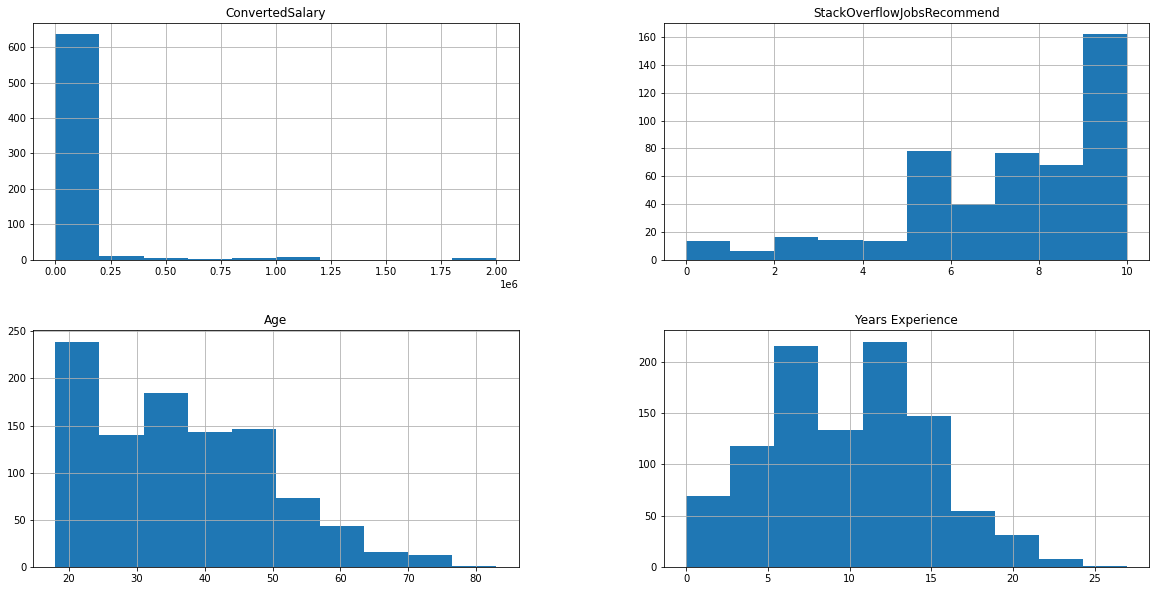

In [30]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]
numeric_data.hist()


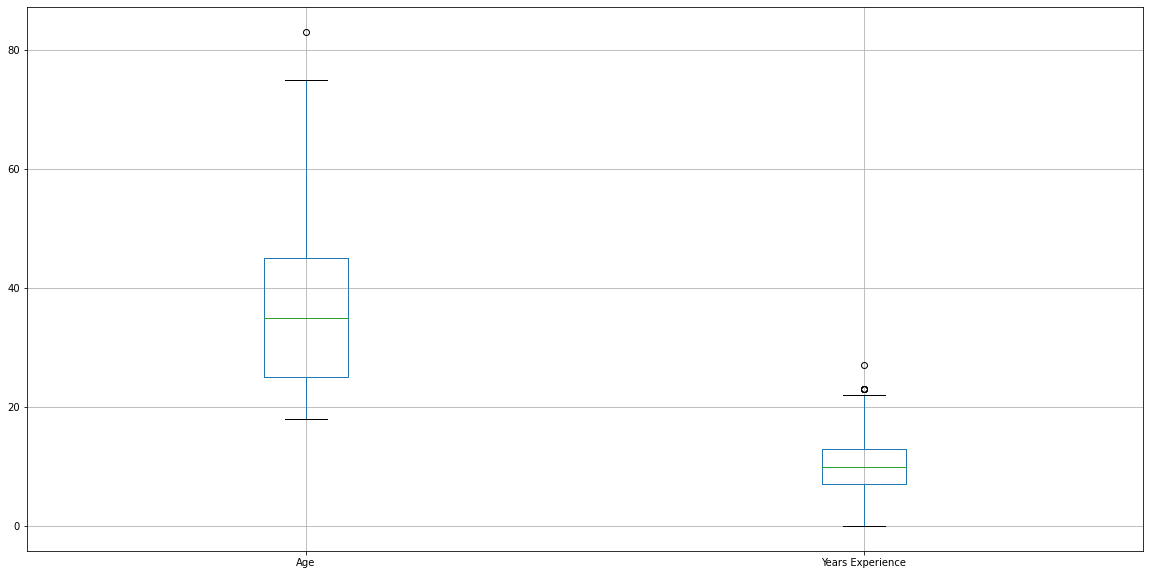

In [31]:
numeric_data[['Age','Years Experience']].boxplot()
plt.show()

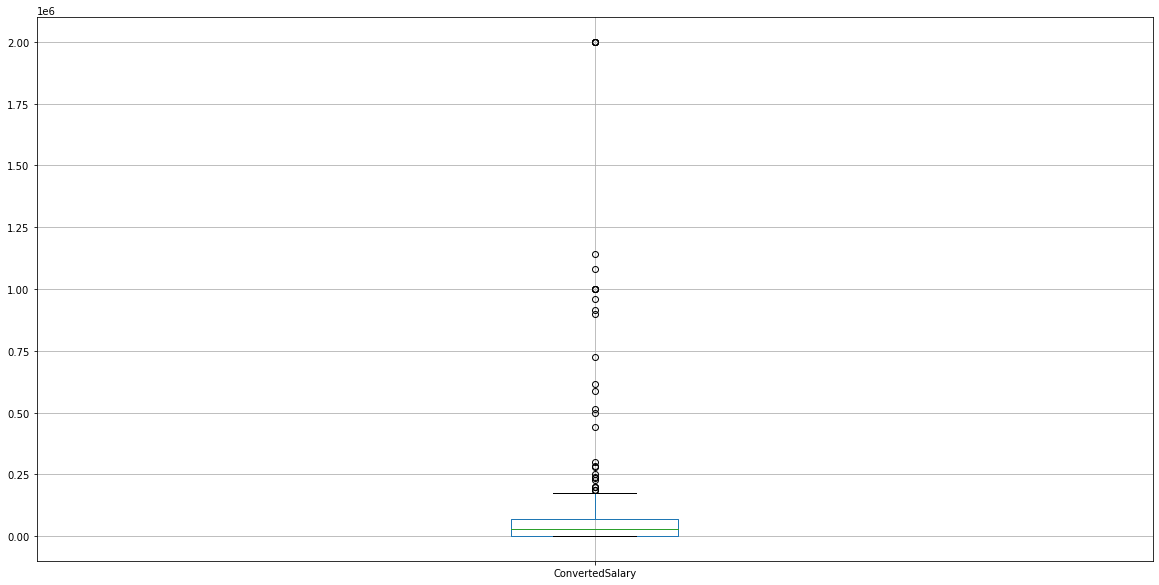

In [32]:
data[['ConvertedSalary']].boxplot()
plt.show()

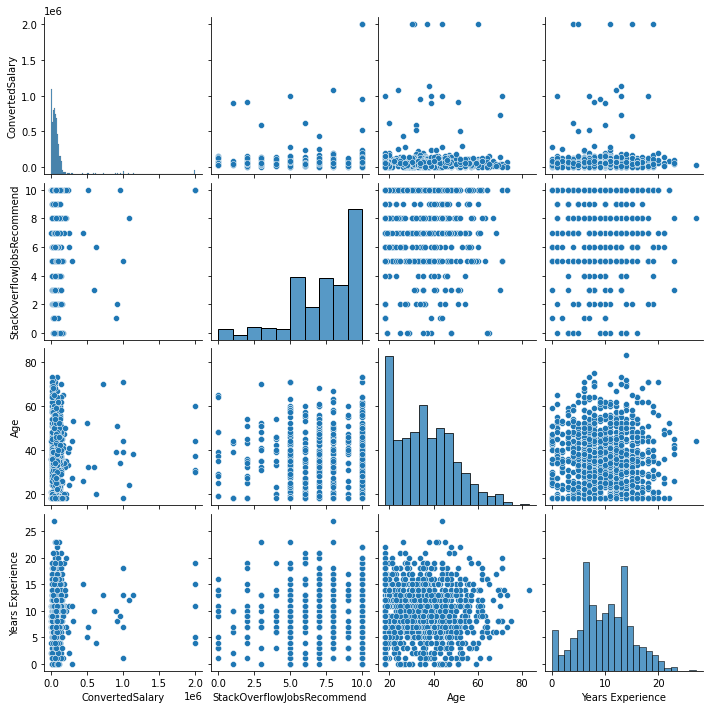

In [33]:
import seaborn as sns
sns.pairplot(numeric_data)
plt.show()

In [34]:
print(numeric_data.describe())

       ConvertedSalary  StackOverflowJobsRecommend         Age  \
count     6.650000e+02                  487.000000  999.000000   
mean      9.256517e+04                    7.061602   36.003003   
std       2.091344e+05                    2.621591   13.255127   
min       0.000000e+00                    0.000000   18.000000   
25%       2.755000e+04                    5.000000   25.000000   
50%       5.556200e+04                    7.000000   35.000000   
75%       8.823800e+04                   10.000000   45.000000   
max       2.000000e+06                   10.000000   83.000000   

       Years Experience  
count        999.000000  
mean           9.961962  
std            4.878129  
min            0.000000  
25%            7.000000  
50%           10.000000  
75%           13.000000  
max           27.000000  


In [35]:
from sklearn.preprocessing import MinMaxScaler
MM_scaler=MinMaxScaler()
MM_scaler.fit(numeric_data[['Age']])
numeric_data['Age_MM']=MM_scaler.transform(numeric_data[['Age']])
print(numeric_data[['Age_MM','Age']].head())

     Age_MM  Age
0  0.046154   21
1  0.307692   38
2  0.415385   45
3  0.430769   46
4  0.323077   39


/var/folders/s8/w_txbs_n3nd84l3rd0mc41br0000gn/T/ipykernel_5850/2635674425.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data['Age_MM']=MM_scaler.transform(numeric_data[['Age']])


In [36]:
from sklearn.preprocessing import StandardScaler
SS_scaler=StandardScaler()
SS_scaler.fit(numeric_data[['Age']])
numeric_data['Age_SS']=SS_scaler.transform(numeric_data[['Age']])
print(numeric_data[['Age_SS','Age']].head())

     Age_SS  Age
0 -1.132431   21
1  0.150734   38
2  0.679096   45
3  0.754576   46
4  0.226214   39


/var/folders/s8/w_txbs_n3nd84l3rd0mc41br0000gn/T/ipykernel_5850/1428103167.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data['Age_SS']=SS_scaler.transform(numeric_data[['Age']])


/var/folders/s8/w_txbs_n3nd84l3rd0mc41br0000gn/T/ipykernel_5850/854946149.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numeric_data['ConvertedSalaryLG']=pow_trans.transform(numeric_data[['ConvertedSalary']])


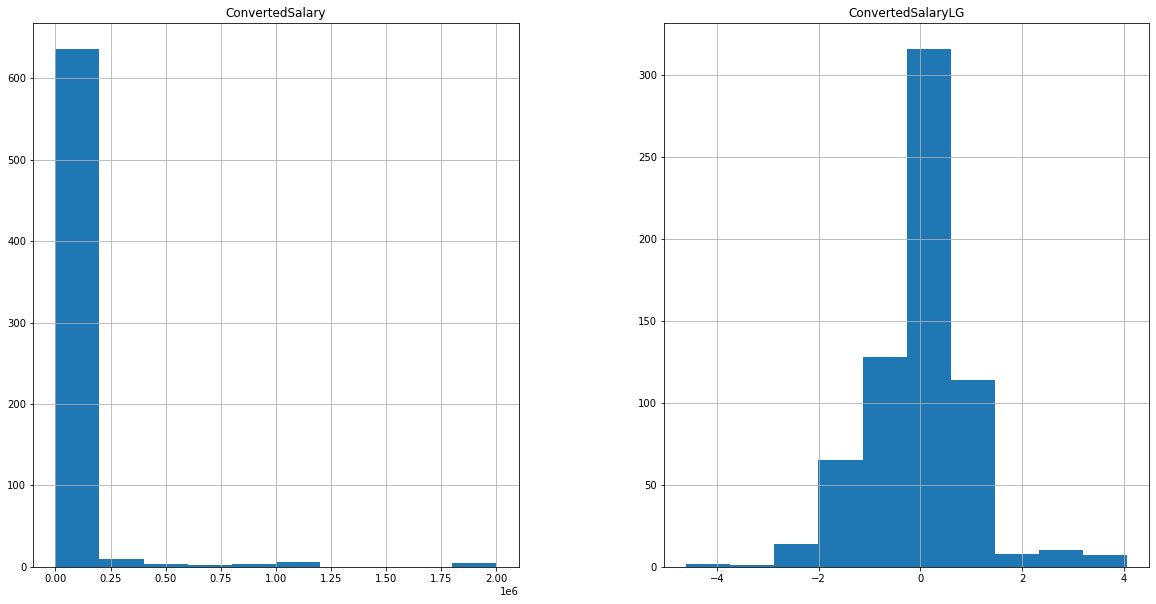

In [37]:
from sklearn.preprocessing import PowerTransformer
pow_trans=PowerTransformer()
pow_trans.fit(numeric_data[['ConvertedSalary']])
numeric_data['ConvertedSalaryLG']=pow_trans.transform(numeric_data[['ConvertedSalary']])
numeric_data[['ConvertedSalary','ConvertedSalaryLG']].hist()
plt.show()

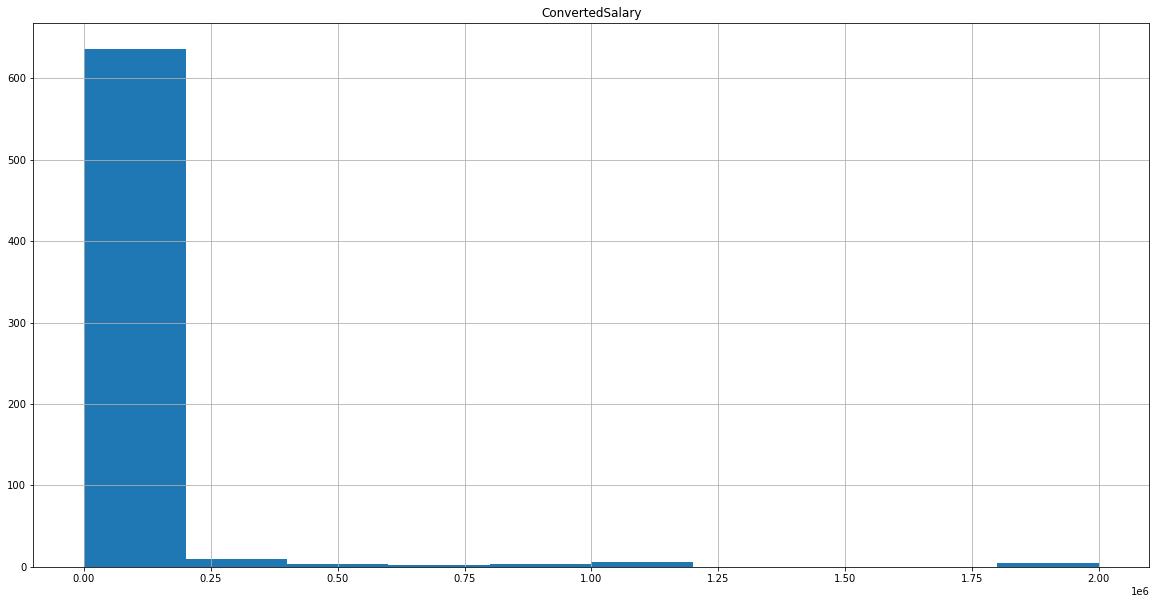

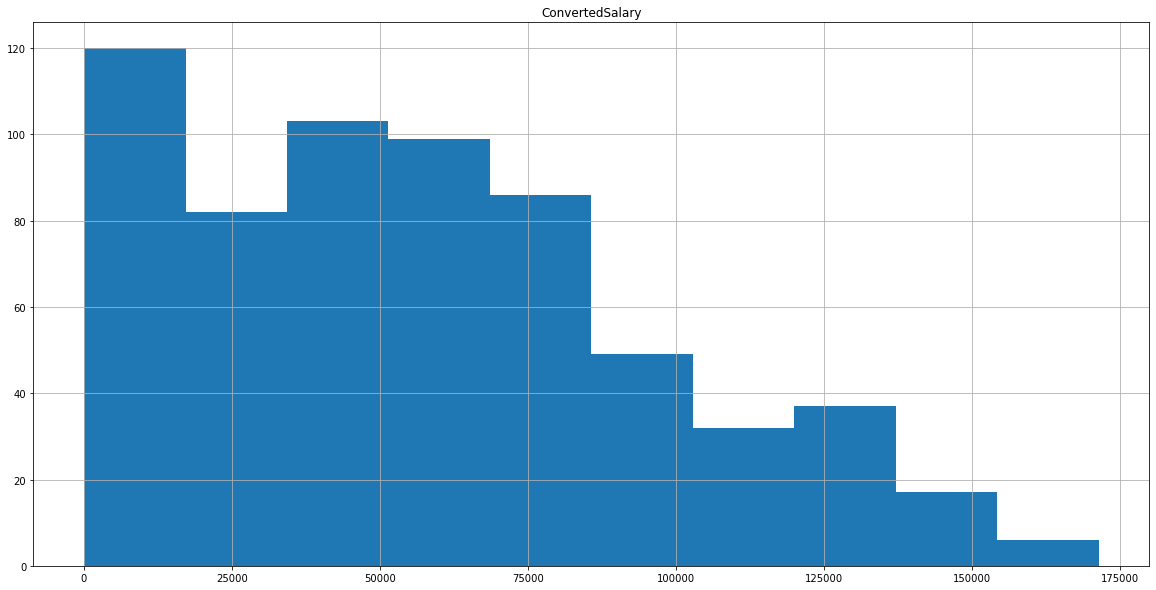

In [38]:
quantile=numeric_data['ConvertedSalary'].quantile(0.95)
trimmed_data=numeric_data[numeric_data['ConvertedSalary']<quantile]
numeric_data[['ConvertedSalary']].hist()
plt.show()
trimmed_data[['ConvertedSalary']].hist()
plt.show()

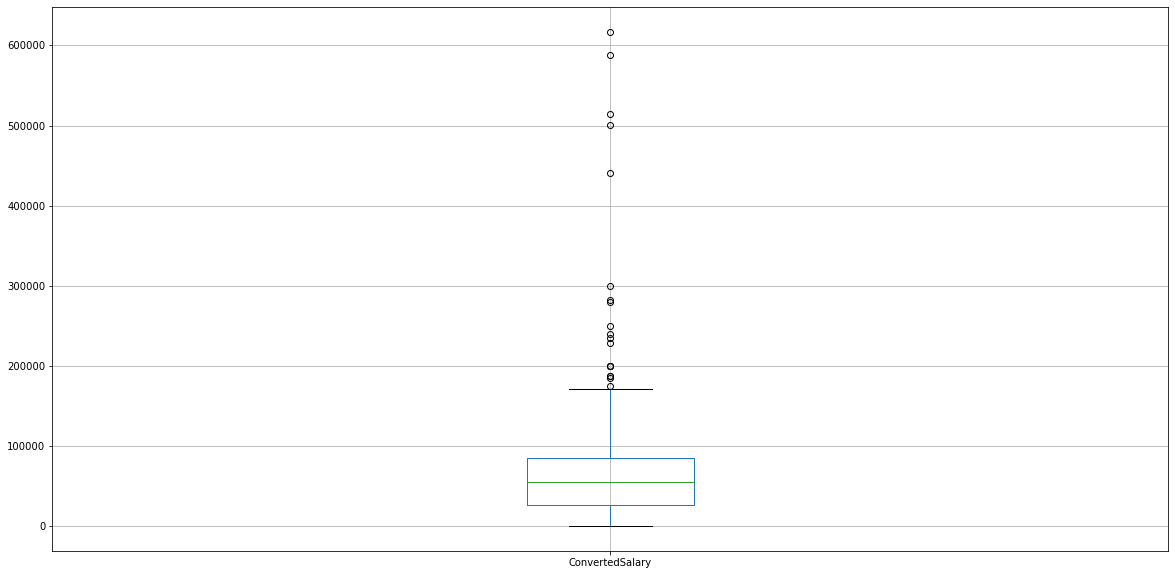

In [39]:
mean=numeric_data['ConvertedSalary'].mean()
std=numeric_data['ConvertedSalary'].std()
cut_off=std*3
lower,upper=mean-cut_off,mean+cut_off
trimmed_data=numeric_data[(numeric_data['ConvertedSalary']<upper)&(numeric_data['ConvertedSalary']>lower)]
trimmed_data[['ConvertedSalary']].boxplot()
plt.show()


In [41]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(numeric_data,test_size=0.2)

In [42]:
from sklearn.preprocessing import StandardScaler
SS_scaler=StandardScaler()
SS_scaler.fit(train[['Age']])
test["Age_ss"]=SS_scaler.transform(test[['Age']])
print(test[['Age','Age_ss']].head())

     Age    Age_ss
113   24 -0.906796
38    34 -0.153646
475   44  0.599504
363   42  0.448874
313   30 -0.454906


/var/folders/s8/w_txbs_n3nd84l3rd0mc41br0000gn/T/ipykernel_5850/3751762679.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Age_ss"]=SS_scaler.transform(test[['Age']])


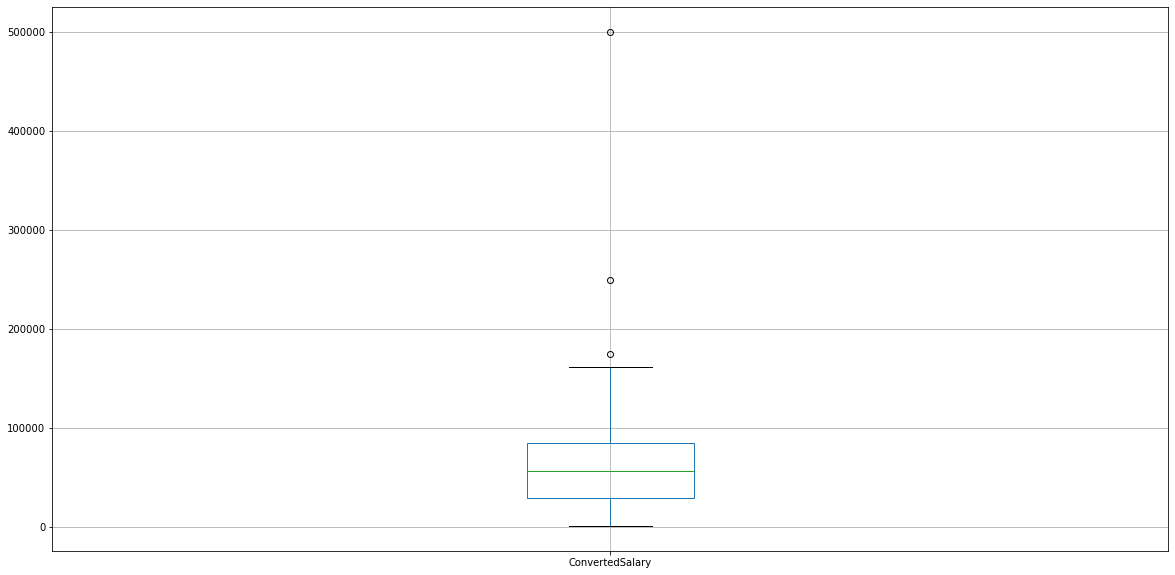

In [43]:
train_std=train['ConvertedSalary'].std()
train_mean=train['ConvertedSalary'].mean()
cut_off=train_std*3
train_lower,train_upper=train_mean-cut_off,train_mean+cut_off
trimmed_data=test[(test['ConvertedSalary']<train_upper)&(test['ConvertedSalary']>train_lower)]
trimmed_data[['ConvertedSalary']].boxplot()
plt.show()